# Solution to Exercise 4.8.13  

This question should be answered using the Weekly data set, which is part of the ISLR2 package. This data is similar in nature to the Smarket data from this chapter’s lab, except that it contains 1,089 weekly returns for 21 years, from the beginning of 1990 to the end of 2010.

In [2]:
# Imports related modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay,roc_curve, RocCurveDisplay

In [9]:
# load the dataset 
df=pd.read_csv('Weekly.csv')
print(df.head())

   Year   Lag1   Lag2   Lag3   Lag4   Lag5    Volume  Today Direction
0  1990  0.816  1.572 -3.936 -0.229 -3.484  0.154976 -0.270      Down
1  1990 -0.270  0.816  1.572 -3.936 -0.229  0.148574 -2.576      Down
2  1990 -2.576 -0.270  0.816  1.572 -3.936  0.159837  3.514        Up
3  1990  3.514 -2.576 -0.270  0.816  1.572  0.161630  0.712        Up
4  1990  0.712  3.514 -2.576 -0.270  0.816  0.153728  1.178        Up


(a) Produce some numerical and graphical summaries of the Weekly data. Do there appear to be any patterns?\
To answer this question, we generate data statistics, scatter plot and correlation mapping between any two predictors; The correlations between the “lag” variables and today’s returns are close to zero. The only substantial correlation is between “Year” and “Volume”. When we plot “Volume”, we see that it is increasing over time. 

              Year         Lag1         Lag2         Lag3         Lag4  \
count  1089.000000  1089.000000  1089.000000  1089.000000  1089.000000   
mean   2000.048669     0.150585     0.151079     0.147205     0.145818   
std       6.033182     2.357013     2.357254     2.360502     2.360279   
min    1990.000000   -18.195000   -18.195000   -18.195000   -18.195000   
25%    1995.000000    -1.154000    -1.154000    -1.158000    -1.158000   
50%    2000.000000     0.241000     0.241000     0.241000     0.238000   
75%    2005.000000     1.405000     1.409000     1.409000     1.409000   
max    2010.000000    12.026000    12.026000    12.026000    12.026000   

              Lag5       Volume        Today  
count  1089.000000  1089.000000  1089.000000  
mean      0.139893     1.574618     0.149899  
std       2.361285     1.686636     2.356927  
min     -18.195000     0.087465   -18.195000  
25%      -1.166000     0.332022    -1.154000  
50%       0.234000     1.002680     0.241000  
75% 

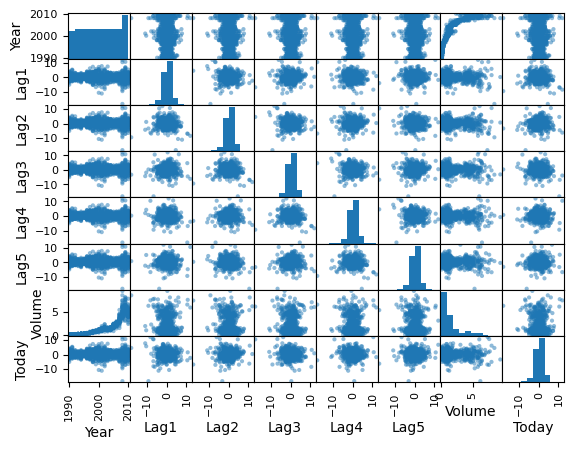

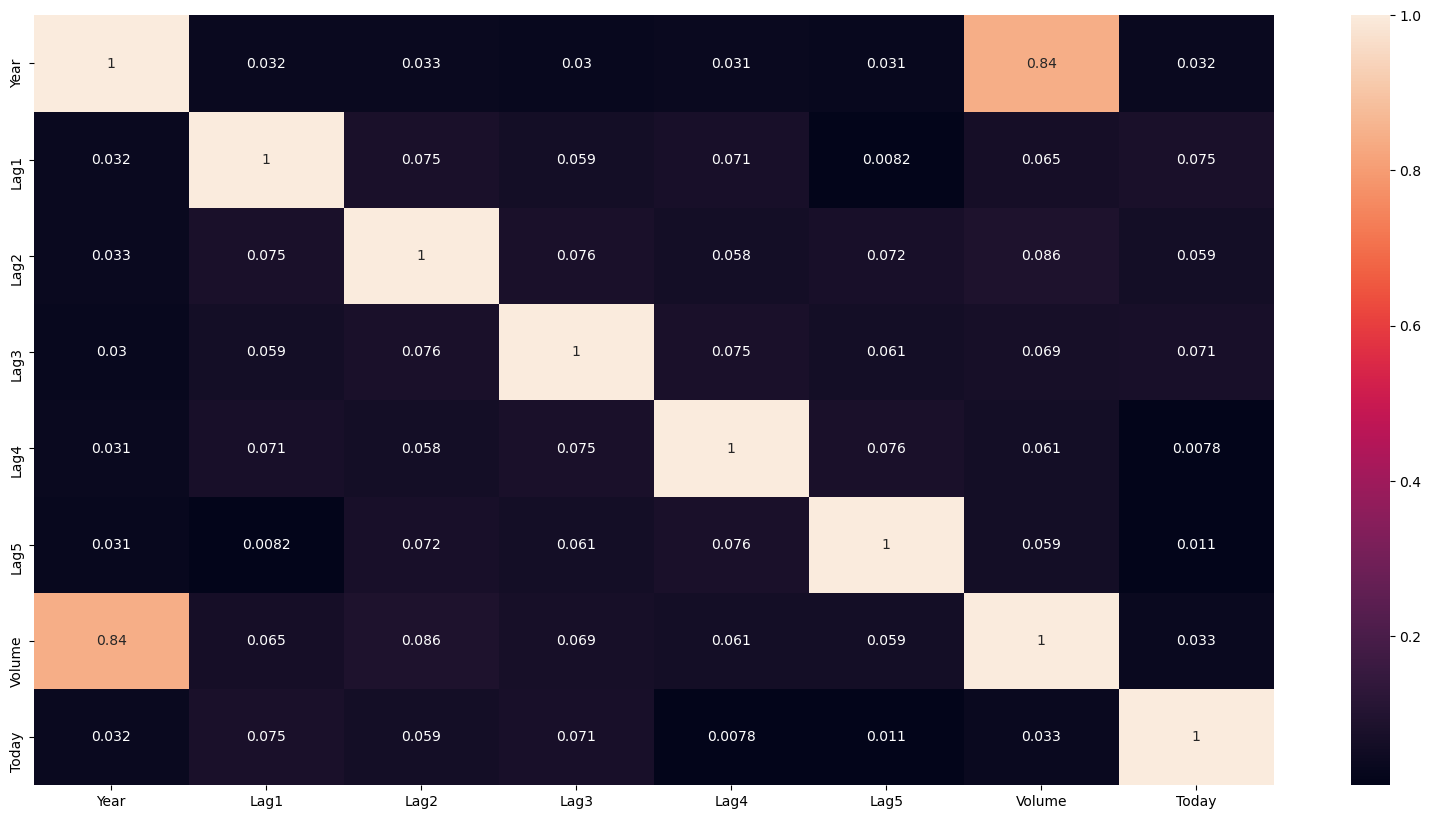

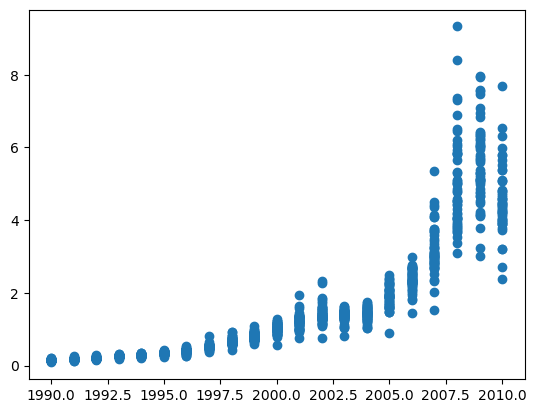

In [8]:
print(df.describe())
pd.plotting.scatter_matrix(df)
plt.figure(figsize=(20,10))
sns.heatmap(df.corr().abs(),annot=True)
plt.show()
plt.scatter(df.loc[:,'Year'],df.loc[:,'Volume'])
plt.show()

(b) Use the full data set to perform a logistic regression with Direction as the response and the five lag variables plus Volume as predictors. Use the summary function to print the results. Do any of the predictors appear to be statistically significant? If so, which ones? \
We use the logistic regression function from the module statsmodels.api since its produce complete fitting summery. It would seem that “Lag2” is the only predictor statistically significant as its p-value is less than 0.05. 

In [20]:
X=df.loc[:,'Lag1':'Volume']
y=df.Direction
y.replace(['Up', 'Down'],[1, 0], inplace=True)
X = sm.add_constant(X, prepend=False)
logit_mod = sm.Logit(y, X)
logit_res = logit_mod.fit()
print(logit_res.params)
print(logit_res.summary())
y_hat = logit_res.predict(X)
y_hat = (y_hat > 0.5).astype(int)
print(y_hat.head())
print((y-y_hat).head())
print('Test score: %.4f'%accuracy_score(y, y_hat))

Optimization terminated successfully.
         Current function value: 0.682441
         Iterations 4
Lag1     -0.041269
Lag2      0.058442
Lag3     -0.016061
Lag4     -0.027790
Lag5     -0.014472
Volume   -0.022742
const     0.266864
dtype: float64
                           Logit Regression Results                           
Dep. Variable:              Direction   No. Observations:                 1089
Model:                          Logit   Df Residuals:                     1082
Method:                           MLE   Df Model:                            6
Date:                Wed, 28 Sep 2022   Pseudo R-squ.:                0.006580
Time:                        16:33:22   Log-Likelihood:                -743.18
converged:                       True   LL-Null:                       -748.10
Covariance Type:            nonrobust   LLR p-value:                    0.1313
                 coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------

(c) Compute the confusion matrix and overall fraction of correct predictions. Explain what the confusion matrix is telling you about the types of mistakes made by logistic regression. \
We may conclude that the percentage of correct predictions on the training data is (54+557)/1089=56.11%. In other words 43.89% is the training error rate, which is often overly optimistic. We could also say that for weeks when the market goes up, the model is right 92.07% of the time (557/(48+557)). For weeks when the market goes down, the model is right only 11.16% of the time (54/(54+430)).

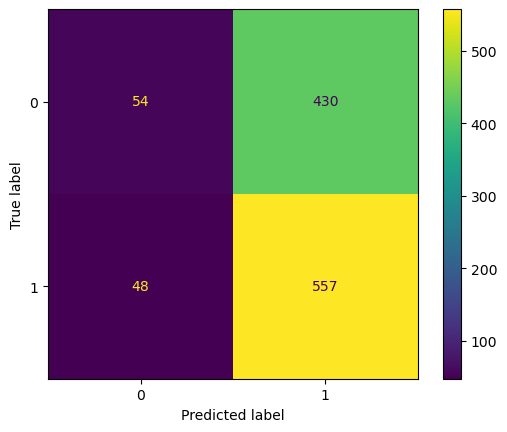

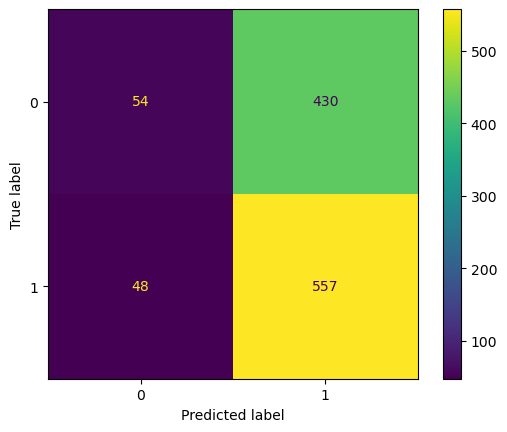

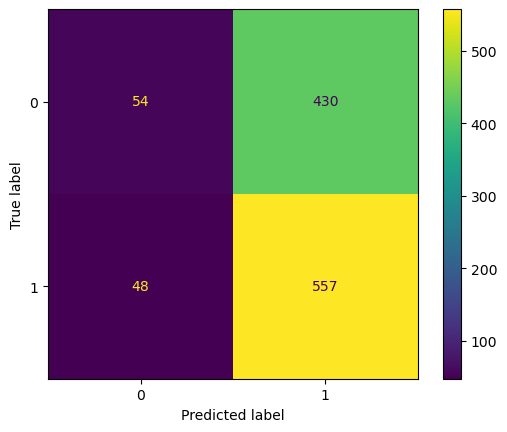

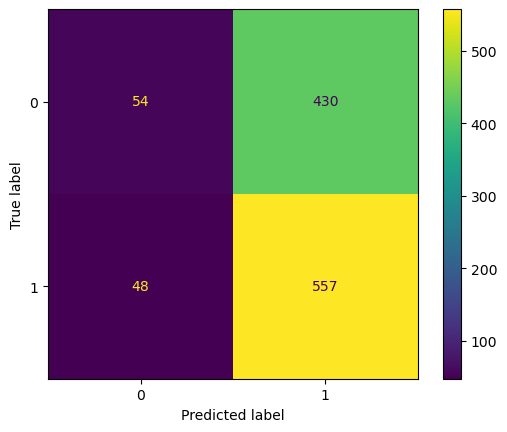

"\nX=df.loc[:,'Lag1':'Volume']\ny=df.Direction\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)\nclf = make_pipeline(StandardScaler(), LogisticRegression(random_state=0))\nclf.fit(X_train, y_train)\n\ny_pred = clf.predict(X_test)\ncm = confusion_matrix(y_test, y_pred)\ncm_display = ConfusionMatrixDisplay(cm).plot()\n\ny_score = clf.decision_function(X_test)\nfpr, tpr, _ = roc_curve(y_test, y_score, pos_label=clf.classes_[1])\nroc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()\nplt.show() \n"

In [22]:
cm = confusion_matrix(y, y_hat)
cm_display = ConfusionMatrixDisplay(cm).plot()
plt.show()

(d) Now fit the logistic regression model using a training data period from 1990 to 2008, with Lag2 as the only predictor. Compute the confusion matrix and the overall fraction of correct predictions for the held out data (that is, the data from 2009 and 2010).

In [91]:
# Get the predictors and response, note: need to covert pandas series to frame for one predictor
train_df =df[df['Year'] > 1989] 
train_df = train_df[train_df['Year'] < 2009] 
X_train = train_df.loc[:,'Lag2']
X_train = X_train.to_frame()
y_train=train_df.Direction
y_train.replace(['Up', 'Down'],[1, 0], inplace=True)

test_df = df[df['Year'].isin([2009, 2010])] 
X_test = test_df.loc[:,'Lag2']
X_test = X_test.to_frame()
y_test=test_df.Direction
y_test.replace(['Up', 'Down'],[1, 0], inplace=True)

0.625


/Users/geng/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [ ]:
# logistic regression
logreg = LogisticRegression(C=1e5)
logreg.fit(X_train,y_train)
y_test_hat=logreg.predict(X_test)
print(logreg.score(X_test,y_test))

(e) Repeat (d) using LDA.

In [92]:
# LDA
lda = LinearDiscriminantAnalysis()
lda.fit(X_train,y_train)
y_test_hat=lda.predict(X_test)
print(lda.score(X_test,y_test))

0.625


(f) Repeat (d) using QDA.

In [93]:
# QDA
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train,y_train)
y_test_hat=qda.predict(X_test)
print(qda.score(X_test,y_test))

0.5865384615384616


(g) Repeat (d) using KNN with K = 1.

In [94]:
# KNN
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
Y_hat=knn.predict(X_test)
print(knn.score(X_test,y_test))

0.5288461538461539


(h) Repeat (d) using naive Bayes.

In [95]:
# Naive Bayes
gaussian = GaussianNB()
gaussian.fit(X_train,y_train)
Y_hat=gaussian.predict(X_test)
gaussian.score(X_test,y_test)

0.5865384615384616

(i) Which of these methods appears to provide the best results on this data? \
If we compare the test error rates, we see that logistic regression and LDA have the minimum error rates, followed by QDA and KNN.

(j) Experiment with different combinations of predictors, including possible transformations and interactions, for each of the methods. Report the variables, method, and associated confusion matrix that appears to provide the best results on the held out data. Note that you should also experiment with values for K in the KNN classifier.\
Up to this point, you have all the techniques needed to perform classification. \
(1) How to pick predictors as needed: use df.loc() or directly select columns in df. \
(2) How to apply transformation and interaction: use df.assign() and lambda function (see code for exercise 3.7.10). \
(3) How to apply different classification approaches: logistic regression, LDA, QDA, KNN, Naive Bayes. \
Enjoy your experiment and I would like to see if you can beat what we got in part (d) and (e) 62.5%. 